In [15]:
import matplotlib.pyplot as plt


# Preparing data for testing models


In [16]:
import numpy as np

np.random.seed(1337)

# Class 0
mean0 = [2, 2]
cov0 = [[1, 0.5], [0.5, 1]]
data0 = np.random.multivariate_normal(mean0, cov0, 100)

# Class 1
mean1 = [5, 5]
cov1 = [[1, -0.5], [-0.5, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, 100)

# Concate
x = np.vstack((data0, data1))
y = np.array([0]*100 + [1]*100)

print(x[:5])
print(y[:5])


[[ 2.85411926  2.36383689]
 [ 3.15623874  1.40116003]
 [ 2.82665561  0.81539103]
 [ 2.31398477  2.65120177]
 [ 1.34403698 -0.02669958]]
[0 0 0 0 0]


### LDA

In [17]:
from BinaryClassifiers import LDA


In [18]:
lda = LDA()


In [19]:
lda.fit(x, y)

xx, yy, z = lda.find_border()


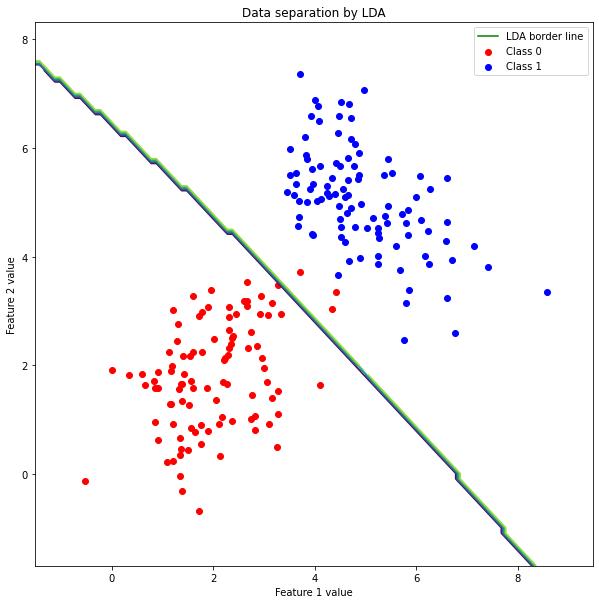

In [20]:
plt.figure(figsize=((10, 10)))

contour = plt.contour(xx, yy, z)
plt.clabel(contour, fontsize=0)
plt.plot([], [], "g", label="LDA border line")

plt.scatter(
    x[y == 0][:, 0],
    x[y == 0][:, 1],
    color="red",
    label="Class 0"
    )

plt.scatter(
    x[y == 1][:, 0],
    x[y == 1][:, 1],
    color="blue",
    label="Class 1"
    )

plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Data separation by LDA")
plt.savefig("plots/LDA_data_separation.png")
plt.show()


### QDA

In [21]:
from BinaryClassifiers import QDA


In [22]:
qda = QDA()


In [23]:
qda.fit(x, y)

xx, yy, z = qda.find_border()


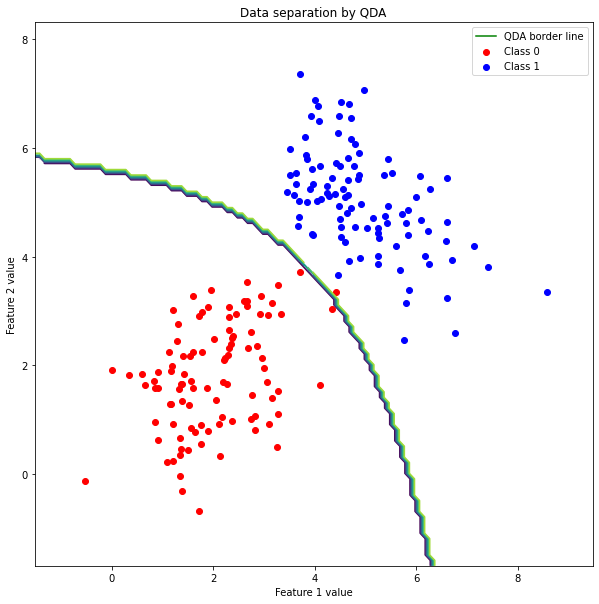

In [24]:
plt.figure(figsize=((10, 10)))

contour = plt.contour(xx, yy, z)
plt.clabel(contour, fontsize=0)
plt.plot([], [], "g", label="QDA border line")

plt.scatter(
    x[y == 0][:, 0],
    x[y == 0][:, 1],
    color="red",
    label="Class 0"
    )

plt.scatter(
    x[y == 1][:, 0],
    x[y == 1][:, 1],
    color="blue",
    label="Class 1"
    )

plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Data separation by QDA")
plt.savefig("plots/QDA_data_separation.png")
plt.show()


### Naive Bayes

In [25]:
from BinaryClassifiers import NaiveBayes


In [26]:
naive_bayes = NaiveBayes()


In [27]:
naive_bayes.fit(x, y)

xx, yy, z = naive_bayes.find_border()


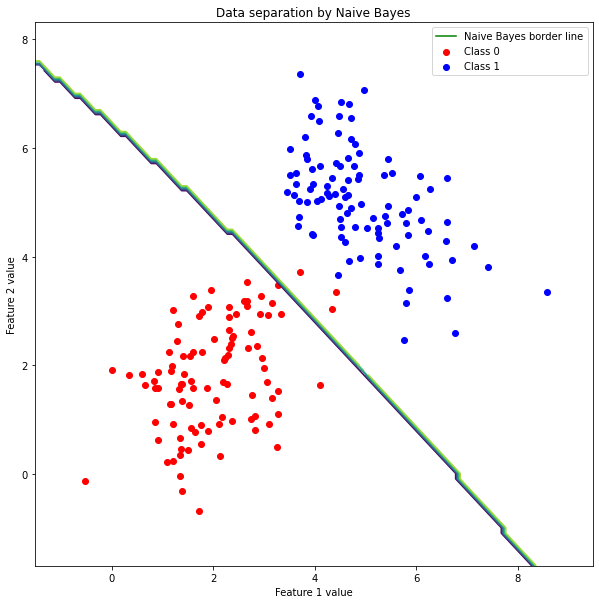

In [28]:
plt.figure(figsize=((10, 10)))

contour = plt.contour(xx, yy, z)
plt.clabel(contour, fontsize=0)
plt.plot([], [], "g", label="Naive Bayes border line")

plt.scatter(
    x[y == 0][:, 0],
    x[y == 0][:, 1],
    color="red",
    label="Class 0"
    )

plt.scatter(
    x[y == 1][:, 0],
    x[y == 1][:, 1],
    color="blue",
    label="Class 1"
    )

plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Data separation by Naive Bayes")
plt.savefig("plots/NaiveBayes_data_separation.png")
plt.show()
